In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
# pip install wordcloud
from wordcloud import WordCloud

In [3]:
import nltk
import re

In [4]:
# import the data
df = pd.read_parquet("0-324.parquet.gzip")


In [5]:
df.isna().sum().sum()

12

In [47]:
df.groupby(['user_id'])

In [6]:
df=df.dropna()

In [51]:
df.isna().sum()

username    0
user_id     0
text        0
dtype: int64

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

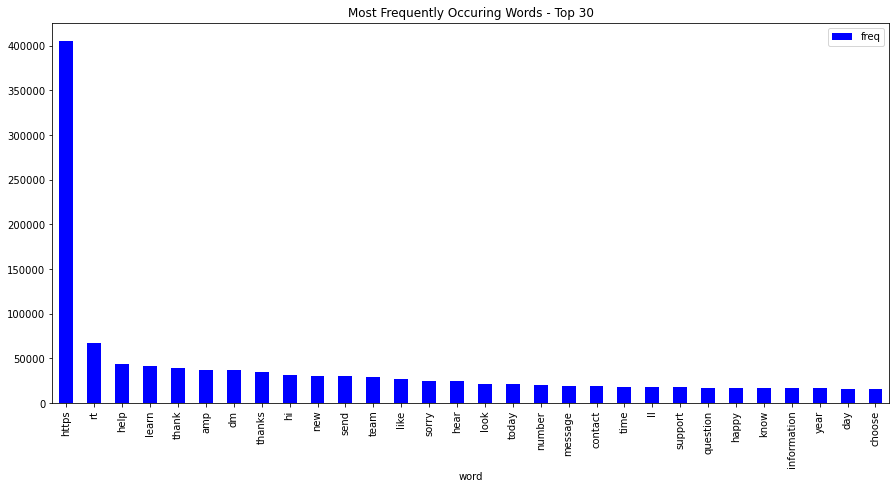

In [7]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

# ax = sns.countplot(x="word", data=frequency.head(30))

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

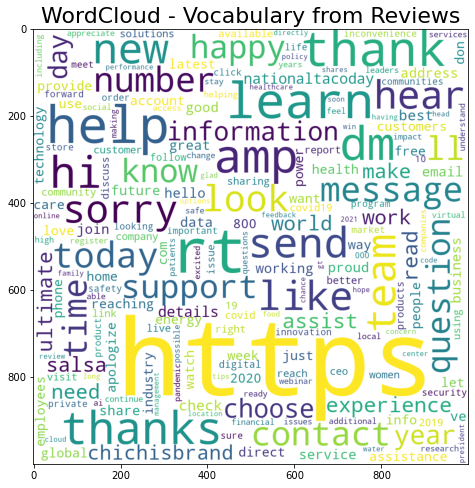

In [53]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [54]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [56]:
hashtag = hashtag_extract(df['text'])
ht = [x for x in hashtag if x != []]


In [61]:
# unnesting
# ht = sum(ht,[])
# ht
from itertools import chain
ht=list(chain.from_iterable(ht))

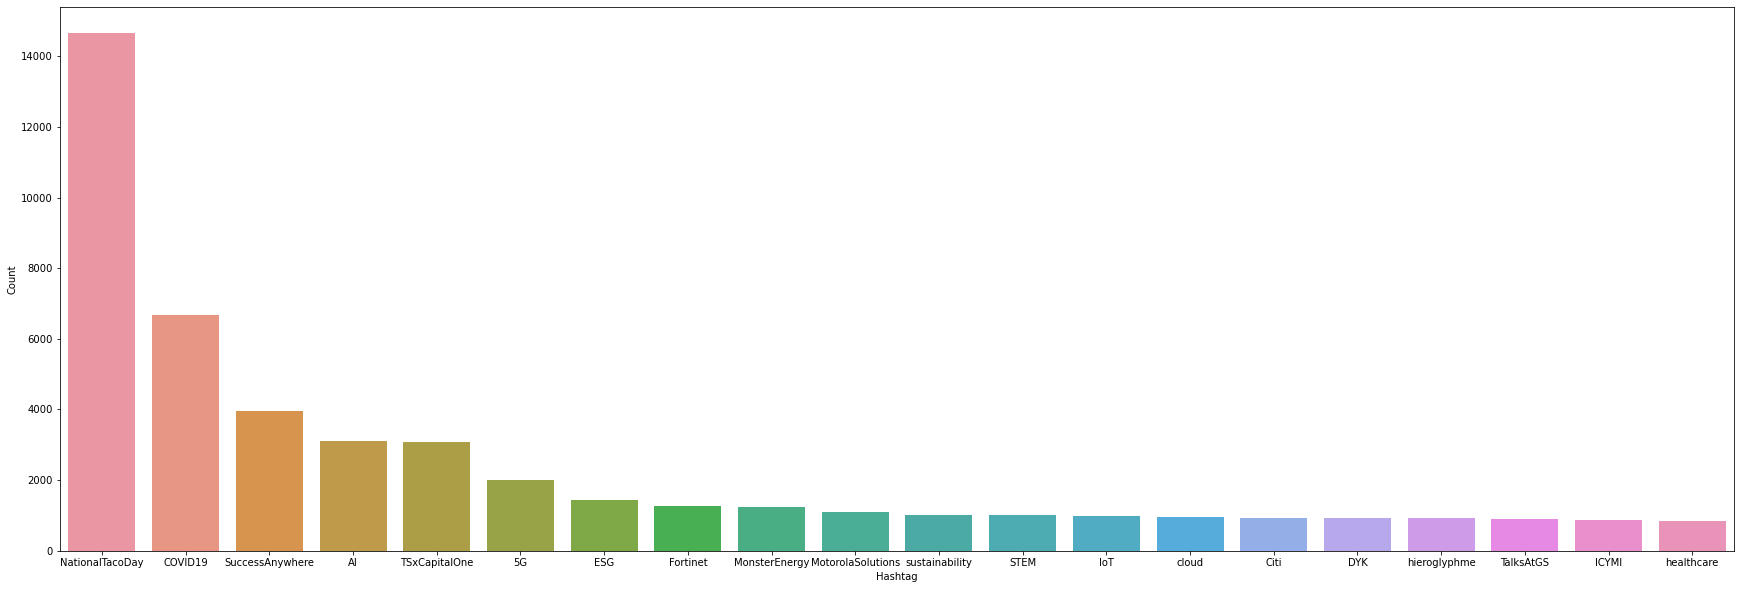

In [67]:
distr_hash = nltk.FreqDist(ht)
df_hash = pd.DataFrame({'Hashtag': list(distr_hash.keys()),
                  'Count': list(distr_hash.values())})

# selecting top 20 most frequent hashtags     
df_hash = df_hash.nlargest(columns="Count", n=20) 
plt.figure(figsize=(30,10))
ax = sns.barplot(data=df_hash, x="Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()